In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Display the data table for preview
merged_df = pd.merge(mouse_metadata, study_results,on="Mouse ID")
merged_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
#mouse_metadata["Mouse ID"].value_counts() 
len(mouse_metadata["Mouse ID"].value_counts())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#THE duplicate signifies that there is one duplicate ID
duplicate_mouse_id = merged_df.duplicated(subset=["Mouse ID","Timepoint"])

# Optional: Get all the data for the duplicate mouse ID. 
merged_df[duplicate_mouse_id ].values

##merged_df[merged_df["Mouse ID"] == merged_df.duplicated(merged_df["Mouse ID","Timepoint"])]

array([['g989', 'Propriva', 'Female', 21, 26, 0, 45.0, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 5, 47.57039208, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 10, 49.8805278, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 15, 53.44201976, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 20, 54.65765008, 1]],
      dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = merged_df[merged_df["Mouse ID"] !="g989"]
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df["Mouse ID"].unique())

248

Summary Statistics

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_group = clean_mouse_study_df.groupby(["Drug Regimen"])
drug_regimen_group

In [10]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

avg_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].mean()

median_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].median()

var_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].var()

std_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].std()

sem_tumor_vol = drug_regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

tumor_volume_df = pd.DataFrame({
                                "Mean Avg Tumor Volume": avg_tumor_vol,
                                "Median Tumor Volume": median_tumor_vol,
                                "Variance Tumor volume": var_tumor_vol,
                                "St. Deviation Tumor Volume": std_tumor_vol,
                                "St. Error Tumor Volume": sem_tumor_vol
                                })

tumor_volume_df 

,Mean Avg Tumor Volume,Median Tumor Volume,Variance Tumor volume,St. Deviation Tumor Volume,St. Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line

tumor_volume_df_two = round(drug_regimen_group["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]),2)

tumor_volume_df_two = tumor_volume_df_two.rename(columns={"mean": "Mean Tumor Volume",
                                                          "median": "Median Tumor Volume",
                                                          "var": "Variance Tumor Volume",
                                                          "std": "Standard Deviation Tumor Volume",
                                                          "sem": "SEM Tumor volume"})
                                                          
tumor_volume_df_two                                               


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


Bar and Pie Charts

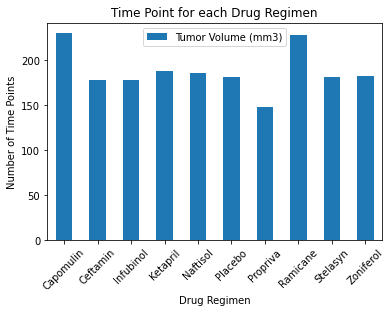

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#so we want to group by drug regimen

tp_barplot = drug_regimen_group.count()["Tumor Volume (mm3)"]
pandas_barplot_needs = pd.DataFrame(tp_barplot)

thee_barplot = pandas_barplot_needs.plot.bar(legend=20,rot=45)
plt.ylabel("Number of Time Points")
plt.title("Time Point for each Drug Regimen")
plt.show()
plt.savefig("barplot1")

In [13]:
import numpy as np

Text(0, 0.5, 'Number of Time Points')

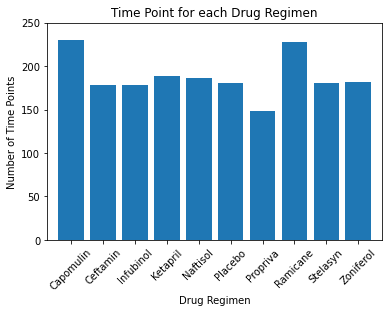

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(tp_barplot))
tick_locations = [i for i in x_axis]


plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane","Stelasyn","Zoniferol"],rotation=45)

plt.bar(x_axis, pandas_barplot_needs["Tumor Volume (mm3)"], align="center")

plt.xlim(-0.75,len(x_axis)-0.25)

plt.ylim(0,250)

plt.title("Time Point for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Time Points")

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_group = mouse_metadata.groupby("Sex").count()
gender_group


,Mouse ID,Drug Regimen,Age_months,Weight (g)
Sex,,,,
Female,124,124,124,124
Male,125,125,125,125


In [16]:
#Labels for pie chart (Female & Male)
labels = [mouse_metadata["Sex"].unique()]
labels = list(gender_group.index)
labels

['Female', 'Male']

In [17]:
sizes = [gender_group["Mouse ID"]]
sizes

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

In [18]:
colors = ["pink", "blue"]
colors

['pink', 'blue']

<AxesSubplot:title={'center':'Distribution of Mice by Gender'}, ylabel='Mouse ID'>

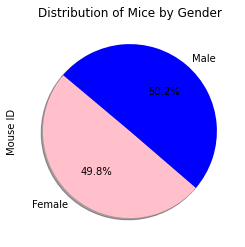

In [19]:
# Tells matplotlib to separate the section from the others
explode = (0.1, 0)

pie_chart_one = gender_group.plot.pie(y='Mouse ID', colors=colors, legend = False,
        autopct="%1.1f%%", shadow=True, title = "Distribution of Mice by Gender", startangle=140)
pie_chart_one

<AxesSubplot:title={'center':'Distribution of Mice by Gender'}, ylabel='Sex'>

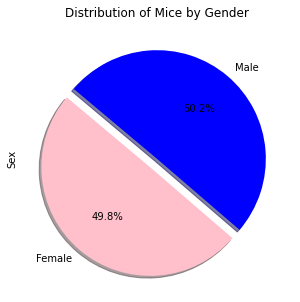

In [20]:
#Piechart by pyplot

pie_chart_two = gender_group["Mouse ID"].plot.pie(y = 'sizes', colors=colors, explode=explode, figsize = (5,5),  autopct="%1.1f%%", shadow=True, 
                            startangle=140)
plt.title("Distribution of Mice by Gender")
plt.ylabel("Sex")
pie_chart_two

Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# #Groupby drug regimen using loc
# capomulin_quartiles = clean_mouse_study_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

# # Start by getting the last (greatest) timepoint for each mouse
# capomulin_lasttime = capomulin_quartiles.groupby('Mouse ID').max()["Timepoint"]
# capomulin_tumorvol = pd.DataFrame(capomulin_lasttime)
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# capomulin_merge = pd.merge(capomulin_tumorvol, merged_df, on=("Mouse ID", "Timepoint"),how="left")
# capomulin_merge.head()

max_timepoint_df = pd.DataFrame(clean_mouse_study_df.groupby("Mouse ID")["Timepoint"].max())
max_timepoint_df = pd.merge(clean_mouse_study_df, max_timepoint_df, how="right", on=["Mouse ID","Timepoint"])
max_timepoint_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [96]:
capomulin_bp_max = max_timepoint_df[max_timepoint_df["Drug Regimen"] == "Capomulin"]
ramicane_bp_max = max_timepoint_df[max_timepoint_df["Drug Regimen"] == "Ramicane"]
infubinol_bp_max = max_timepoint_df[max_timepoint_df["Drug Regimen"] == "Infubinol"]
ceftamin_bp_max = max_timepoint_df[max_timepoint_df["Drug Regimen"] == "Ceftamin"]

In [99]:
cap_quartiles = capomulin_bp_max["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cap_outliers = []
for index, row in capomulin_bp_max[["Mouse ID", "Tumor Volume (mm3)"]].iterrows():
    vol = row["Tumor Volume (mm3)"]
    if vol > cap_upper_bound or vol < cap_lower_bound:
        cap_outliers.append(row["Mouse ID"])

print(f"The lower quartile of capomulin is: {cap_lowerq}")
print(f"The upper quartile of capomulin is: {cap_upperq}")
print(f"The interquartile range of capomulin is: {cap_iqr}")

print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound } could be outliers.")

if (not cap_outliers):
    print("There are no outliers")
else: print(f"Mouse {','.join(cap_outliers)} could be an outlier.")

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no outliers


In [100]:
ram_quartiles = ramicane_bp_max["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*iqr)
ram_upper_bound = ram_upperq + (1.5*iqr)
ram_outliers = []
for index, row in ramicane_bp_max[["Mouse ID", "Tumor Volume (mm3)"]].iterrows():
    vol = row["Tumor Volume (mm3)"]
    if vol > ram_upper_bound or vol < ram_lower_bound:
        ram_outliers.append(row["Mouse ID"])

print(f"The lower quartile of ramicane is: {ram_lowerq}")
print(f"The upper quartile of ramicane is: {ram_upperq}")
print(f"The interquartile range of ramicane is: {ram_iqr}")

print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

if (not ram_outliers):
    print("There are no outliers")
else: print(f"Mouse {','.join(ram_outliers)} could be an outlier.")

The lower quartile of ramicane is: 31.56046955
The upper quartile of ramicane is: 40.65900627
The interquartile range of ramicane is: 9.098536719999998
Values below 19.887674359999995 could be outliers.
Values above 52.33180146000001 could be outliers.
There are no outliers


In [101]:
inf_quartiles = infubinol_bp_max["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*iqr)
inf_upper_bound = inf_upperq + (1.5*iqr)
inf_outliers = []
for index, row in infubinol_bp_max[["Mouse ID", "Tumor Volume (mm3)"]].iterrows():
    vol = row["Tumor Volume (mm3)"]
    if vol > inf_upper_bound or vol < inf_lower_bound:
        inf_outliers.append(row["Mouse ID"])

print(f"The lower quartile of infubinol is: {inf_lowerq}")
print(f"The upper quartile of infubinol is: {inf_upperq}")
print(f"The interquartile range of infubinol is: {inf_iqr}")

print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

if (not inf_outliers):
    print("There are no outliers")
else: print(f"Mouse {','.join(inf_outliers)} could be an outlier.")

The lower quartile of infubinol is: 54.04860769
The upper quartile of infubinol is: 65.52574285
The interquartile range of infubinol is: 11.477135160000003
Values below 42.375812499999995 could be outliers.
Values above 77.19853804 could be outliers.
Mouse c326 could be an outlier.


In [103]:
cef_quartiles = ceftamin_bp_max["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - cef_lowerq

cef_lower_bound = cef_lowerq - (1.5*cap_iqr)
cef_upper_bound = cef_upperq + (1.5*cap_iqr)
cef_outliers = []
for index, row in ceftamin_bp_max[["Mouse ID", "Tumor Volume (mm3)"]].iterrows():
    vol = row["Tumor Volume (mm3)"]
    if vol > cef_upper_bound or vol < cef_lower_bound:
        cef_outliers.append(row["Mouse ID"])

print(f"The lower quartile of capomulin is: {cef_lowerq}")
print(f"The upper quartile of capomulin is: {cef_upperq}")
print(f"The interquartile range of capomulin is: {cef_iqr}")

print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound } could be outliers.")

if (not cef_outliers):
    print("There are no outliers")
else: print(f"Mouse {','.join(cef_outliers)} could be an outlier.")

The lower quartile of capomulin is: 48.72207785
The upper quartile of capomulin is: 64.29983003
The interquartile range of capomulin is: 15.577752179999997
Values below 37.04928265999999 could be outliers.
Values above 75.97262522 could be outliers.
There are no outliers


In [105]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot_data = [capomulin_bp_max, ramicane_bp_max, infubinol_bp_max, ceftamin_bp_max]
                

outlier_features = dict(marker="o", markerfacecolor="red", markeredgecolor="black",markersize=12)

ValueError: Dimensions of labels and X must be compatible

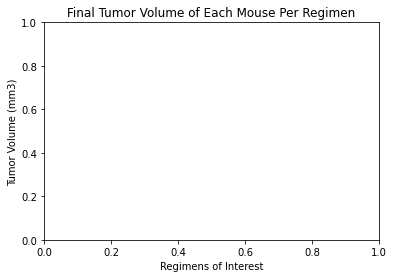

In [111]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse Per Regimen")
ax1.set_xlabel('Regimens of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')

ax1.boxplot(box_plot_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=outlier_features)

plt.show()

Line & Scatter

In [116]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_bp_max = max_timepoint_df[max_timepoint_df["Drug Regimen"] == "Capomulin"]
capomulin_bp_max.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,b128,Capomulin,Female,9,22,45,38.982878,2
24,b742,Capomulin,Male,7,21,45,38.939633,0
61,f966,Capomulin,Male,16,17,20,30.485985,0
64,g288,Capomulin,Male,3,19,45,37.074024,1
66,g316,Capomulin,Female,22,22,45,40.159220,2


In [118]:
line_df = clean_mouse_study_df[clean_mouse_study_df["Drug Regimen"] == "Capomulin"]
line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [120]:
line_dff = line_df.loc[line_df["Mouse ID"] == "s185",:]
line_dff

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


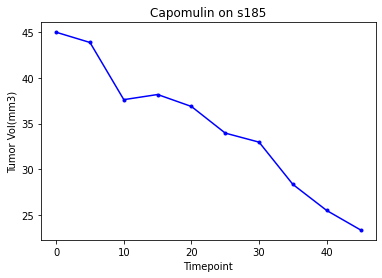

In [124]:
line_df_x = line_dff["Timepoint"]
tumor_size = line_dff["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()
plt.title("Capomulin on s185")
plt.plot(line_df_x, tumor_size, markersize=3, marker="o", color="blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol(mm3)")

plt.show()